In [1]:
%pylab inline
from pylab import rcParams
from math import log
rcParams['figure.figsize'] = 16, 10
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
%matplotlib inline

# настройка внешнего вида графиков в seaborn
sns.set_context(
    "notebook", 
    font_scale = 1.5,       
    rc = { 
        "figure.figsize" : (24, 18), 
        "axes.titlesize" : 18 
    }
)

Populating the interactive namespace from numpy and matplotlib


In [110]:
df = pd.read_csv('data/train.csv', dtype={'Age': np.float16}, index_col='PassengerId')
ts = pd.read_csv('data/test.csv', dtype={'Age': np.float16}, index_col='PassengerId')

### Show data

In [113]:
# print(df.shape)
df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [112]:
ts.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Show types and null's

In [114]:
# df = df.drop('Embarked',axis = 1)
df = df.drop('Cabin',axis = 1)
df = df.drop('Ticket',axis = 1)
df = df.drop('Name',axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float16
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float16(1), float64(1), int64(4), object(2)
memory usage: 50.5+ KB


### Map data to numerical format

In [115]:
df.groupby('Embarked')['Survived'].describe()
embarked_map = {'S':0.3, 'Q':0.4, 'C': 0.6}
df['Embarked'] = df['Embarked'].map(embarked_map)
ts['Embarked'] = ts['Embarked'].map(embarked_map)

In [116]:
gender_map = {'male':0, 'female':1}
df['Sex'] = df['Sex'].map(gender_map)
ts['Sex'] = ts['Sex'].map(gender_map)

### Show basic numerical data distribution

In [117]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,889.000000
mean,0.383838,2.308642,0.352413,29.687500,0.523008,0.381594,32.204208,0.365354
std,0.486592,0.836071,0.477990,14.523438,1.102743,0.806057,49.693429,0.116697
min,0.000000,1.000000,0.000000,0.419922,0.000000,0.000000,0.000000,0.300000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,0.300000
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.300000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,0.400000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,0.600000


In [118]:
ts.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000
mean,2.265550,0.363636,30.265625,0.447368,0.392344,35.627188,0.384211
std,0.841838,0.481622,14.179688,0.896760,0.981429,55.907576,0.126527
min,1.000000,0.000000,0.170044,0.000000,0.000000,0.000000,0.300000
25%,1.000000,0.000000,21.000000,0.000000,0.000000,7.895800,0.300000
50%,3.000000,0.000000,27.000000,0.000000,0.000000,14.454200,0.300000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.500000,0.400000
max,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,0.600000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x08DF4DB0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0A238C90>]], dtype=object)

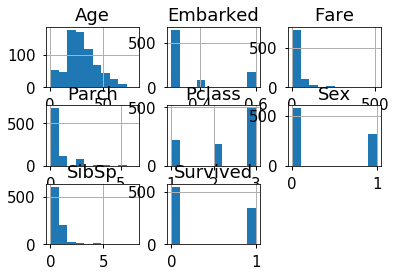

In [119]:
df.hist()

### Check correlation between Survived and numerical columns

In [120]:
df.groupby(['Survived'])[df.columns[2:]].agg([np.mean, np.std])

Sex                 Age                SibSp            \
              mean       std      mean        std      mean       std   
Survived                                                                
0         0.147541  0.354968  30.62500  14.171875  0.553734  1.288399   
1         0.681287  0.466660  28.34375  14.953125  0.473684  0.708688   

             Parch                 Fare             Embarked            
              mean       std       mean        std      mean       std  
Survived                                                                
0         0.329690  0.823166  22.117887  31.388207  0.349545  0.103518  
1         0.464912  0.771712  48.395408  66.596998  0.390882  0.131496

In [121]:
#cols = ['Survived', 'Pclass', 'Sex0', 'Fare'] # , 'Age', 'SibSp', 'Parch'
#sns_plot = sns.pairplot(df[cols])
#sns_plot.savefig('pairplot.png')

In [122]:
numerical_columns = ['Survived', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked']

In [123]:
df.groupby(df.Survived)[numerical_columns].agg([np.mean, np.std])

Survived            Age               Pclass               SibSp  \
             mean  std      mean        std      mean       std      mean   
Survived                                                                    
0               0  0.0  30.62500  14.171875  2.531876  0.735805  0.553734   
1               1  0.0  28.34375  14.953125  1.950292  0.863321  0.473684   

                       Parch                 Fare                  Sex  \
               std      mean       std       mean        std      mean   
Survived                                                                 
0         1.288399  0.329690  0.823166  22.117887  31.388207  0.147541   
1         0.708688  0.464912  0.771712  48.395408  66.596998  0.681287   

                    Embarked            
               std      mean       std  
Survived                                
0         0.354968  0.349545  0.103518  
1         0.466660  0.390882  0.131496

In [124]:
df.groupby(df.Survived)['Pclass'].describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,2.531876,0.735805,1.0,2.0,3.0,3.0,3.0
1,342.0,1.950292,0.863321,1.0,1.0,2.0,3.0,3.0


In [125]:
df.groupby('Pclass')['Survived'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,0.629630,0.484026,0.0,0.0,1.0,1.0,1.0
2,184.0,0.472826,0.500623,0.0,0.0,0.0,1.0,1.0
3,491.0,0.242363,0.428949,0.0,0.0,0.0,0.0,1.0


In [16]:
df.groupby(['Pclass', 'Survived'])[numerical_columns].agg([np.mean, np.std])

Survived             Age            Pclass          SibSp  \
                    mean  std       mean        std   mean  std      mean   
Pclass Survived                                                             
1      0               0  0.0  43.687500  15.281250      1  0.0  0.287500   
       1               1  0.0  35.375000  13.757812      1  0.0  0.492647   
2      0               0  0.0  33.531250  12.148438      2  0.0  0.319588   
       1               1  0.0  25.906250  14.835938      2  0.0  0.494253   
3      0               0  0.0  26.562500  12.335938      3  0.0  0.672043   
       1               1  0.0  20.640625  11.992188      3  0.0  0.436975   

                              Parch                 Fare                  Sex  \
                      std      mean       std       mean        std      mean   
Pclass Survived                                                                 
1      0         0.555610  0.300000  0.700813  64.684008  60.662089  0.037500   
       1         0.632412  0.389706  0.690387  95.608029  85.286820  0.669118   
2      0         0.550500  0.144330  0.432765  19.412328  15.307175  0.061856   
       1         0.644720  0.643678  0.820904  22.055700  10.853502  0.804598   
3      0         1.504700  0.384409  0.914144  13.669364  12.118338  0.193548   
       1         0.829934  0.420168  0.807757  13.694887  10.692993  0.605042   

                           Embarked            
                      std      mean       std  
Pclass Survived                                
1      0         0.191182  0.398750  0.140967  
       1         0.472270  0.432836  0.149070  
2      0         0.242145  0.325773  0.083265  
       1         0.398809  0.333333  0.092342  
3      0         0.395611  0.345161  0.095467  
       1         0.490909  0.385714  0.118096

### Cross Tab

In [63]:
pd.crosstab(df.Pclass, df.Survived)

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [64]:
pd.crosstab(df.Sex, df.Survived)

Survived,0,1
Sex,,
female,81,233
male,468,109


In [22]:
pd.crosstab(df.Embarked, df.Survived)

Survived,0,1
Embarked,,
0.300000,427,217
0.400000,47,30
0.420093,0,2
0.600000,75,93


In [24]:
df.pivot_table(index='Sex', columns='Pclass', values='Age', aggfunc='mean')

Pclass,1,2,3
Sex,,,
0,41.28125,30.734375,26.50
1,34.62500,28.718750,21.75


In [23]:
df[numerical_columns].count()

Survived    891
Age         714
Pclass      891
SibSp       891
Parch       891
Fare        891
Sex         891
Embarked    891
dtype: int64

## Visualize

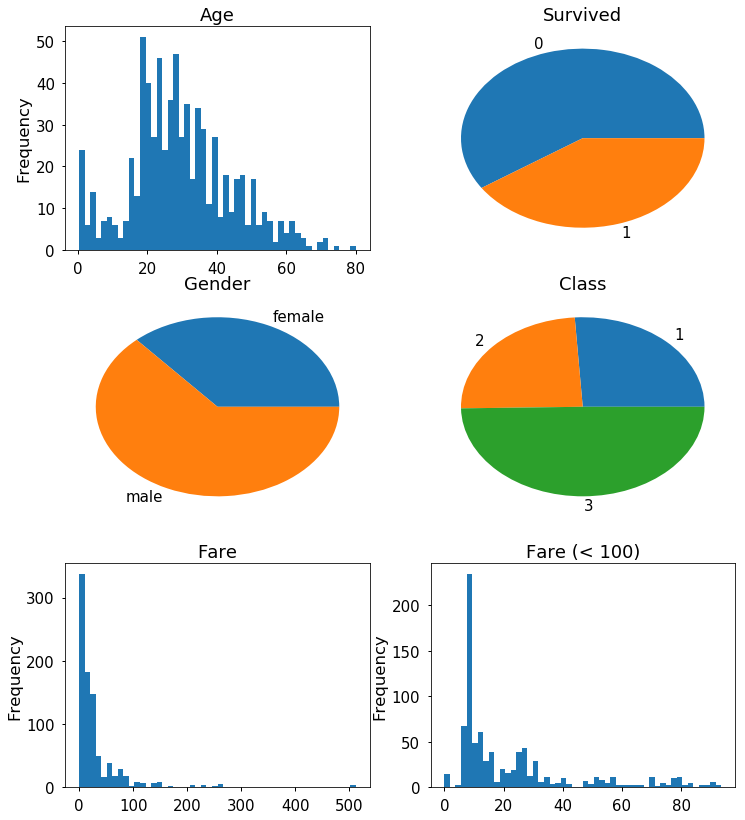

In [147]:
fig, axs = plt.subplots(3, 2, squeeze=False, figsize=(12, 14))
df.Age.plot.hist(bins=50, title='Age', ax=axs[0, 0])
df.groupby('Survived').agg('count')['Age'].plot.pie(title='Survived', ax=axs[0, 1])
axs[0, 1].set_ylabel('')
df.groupby('Sex').agg('count')['Age'].plot.pie(title='Gender', ax=axs[1, 0])
axs[1, 0].set_ylabel('')
df.groupby('Pclass').agg('count')['Age'].plot.pie(title='Class', ax=axs[1, 1])
axs[1, 1].set_ylabel('')
fare = df.Fare
fare.plot.hist(bins=50, title='Fare', ax=axs[2, 0])
fare[fare < 100].plot.hist(bins=50, title='Fare (< 100)', ax=axs[2, 1])

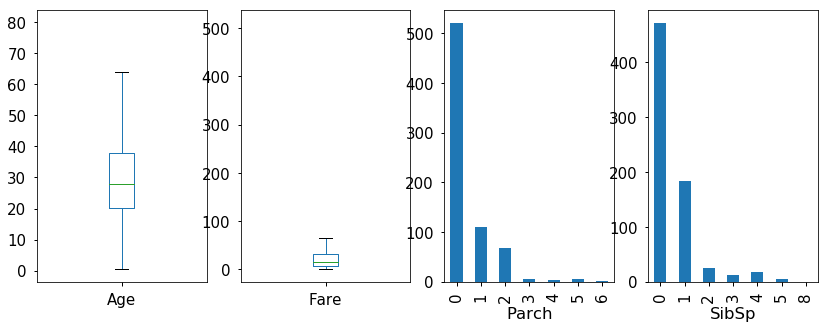

In [148]:
fig, axs = plt.subplots(1, 4, squeeze=False, figsize=(14, 5))
df.Age.plot(kind='box', ax=axs[0, 0])
df.Fare.plot(kind='box', ax=axs[0, 1])
df.groupby('Parch').agg('count')['Age'].plot.bar(ax=axs[0, 2])
df.groupby('SibSp').agg('count')['Age'].plot.bar(ax=axs[0, 3])

Skewness for age : 0.39


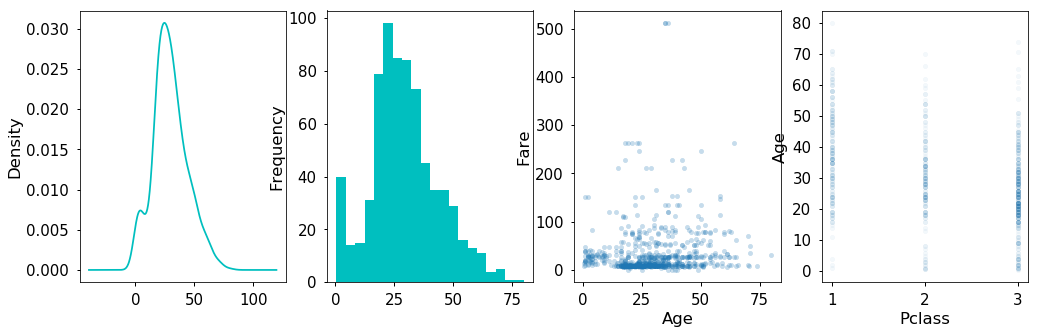

In [158]:
fig, axs = plt.subplots(1, 4, figsize=(17, 5))
df.Age.plot(kind='kde', ax=axs[0], color='c')
df.Age.plot(kind='hist', ax=axs[1], color='c', bins=20)
print('Skewness for age : {0:.2f}'.format(df.Age.skew()))
df.plot.scatter(x='Age', y='Fare', ax=axs[2], alpha=0.25)
df.plot.scatter(x='Pclass', y='Age', ax=axs[3], alpha=0.05)

# Clean null data

## Fill 2 points 'Embarked' with mean by 'Pclass' 

In [126]:
df['Embarked'] = df.groupby(['Pclass'])['Embarked'].transform(lambda x: x.fillna(x.mean()))
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         714 non-null float16
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null float64
dtypes: float16(1), float64(2), int64(5)
memory usage: 89.4 KB


## Fill 1 point 'Fare' with mean by 'Pclass' 

In [127]:
ts['Fare'] = ts.groupby(['Pclass'])['Fare'].transform(lambda x: x.fillna(x.mean()))
ts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null int64
Age         332 non-null float16
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        418 non-null float64
Cabin       91 non-null object
Embarked    418 non-null float64
dtypes: float16(1), float64(2), int64(4), object(3)
memory usage: 28.6+ KB


## Fill with linear regression algoritm

In [136]:
fix_age_columns = ['Pclass', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked']

df_Svc = df.copy()
ts_Svc = ts.copy()
df_Svc['Type'] = 'train'
ts_Svc['Type'] = 'test'
df_Svc = df_Svc.append(ts_Svc)
df_Svc_withAge = df_Svc[fix_age_columns + ['Age', 'Type']].copy()
df_Svc_withAge = df_Svc_withAge[df_Svc_withAge.Age.notnull()]
df_Svc_withAge.info()

df_Svc_withoutAge = df_Svc[fix_age_columns + ['Age', 'Type']].copy()
df_Svc_withoutAge = df_Svc_withoutAge[df_Svc_withoutAge.Age.isnull()]
df_Svc_withoutAge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046 entries, 1 to 1307
Data columns (total 8 columns):
Pclass      1046 non-null int64
SibSp       1046 non-null int64
Parch       1046 non-null int64
Fare        1046 non-null float64
Sex         1046 non-null int64
Embarked    1046 non-null float64
Age         1046 non-null float16
Type        1046 non-null object
dtypes: float16(1), float64(2), int64(4), object(1)
memory usage: 63.3+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 6 to 1309
Data columns (total 8 columns):
Pclass      263 non-null int64
SibSp       263 non-null int64
Parch       263 non-null int64
Fare        263 non-null float64
Sex         263 non-null int64
Embarked    263 non-null float64
Age         0 non-null float16
Type        263 non-null object
dtypes: float16(1), float64(2), int64(4), object(1)
memory usage: 15.9+ KB


In [137]:
pd_X = df_Svc_withAge.loc[:, fix_age_columns]
pd_Y = df_Svc_withAge.Age
pd_pred_X = df_Svc_withoutAge.loc[:, fix_age_columns]
X = np.asarray(pd_X)
Y = np.asarray(pd_Y)
X_pred = np.asarray(pd_pred_X)

In [138]:
from sklearn import linear_model

lin = linear_model.LinearRegression()
lin.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [139]:
Y_pred = lin.predict(X_pred)
Y_pred[Y_pred < 0] = 1
#print(Y_pred)

In [143]:
df_Svc_withoutAge.Age = Y_pred
df_Svc = df_Svc_withoutAge.append(df_Svc_withAge).sort_index()
ts_Svc = df_Svc[df_Svc.Type == 'test']
df_Svc = df_Svc[df_Svc.Type == 'train']
df_Svc = df_Svc.drop(['Type'], axis=1)
ts_Svc = ts_Svc.drop(['Type'], axis=1)
df_Svc['Survived'] = df.Survived
#df_Svc.info()
#ts_Svc.info()
df_Svc.head()

,Pclass,SibSp,Parch,Fare,Sex,Embarked,Age,Survived
PassengerId,,,,,,,,
1,3,1,0,7.2500,0,0.3,22.0,0
2,1,1,0,71.2833,1,0.6,38.0,1
3,3,0,0,7.9250,1,0.3,26.0,1
4,1,1,0,53.1000,1,0.3,35.0,1
5,3,0,0,8.0500,0,0.3,35.0,0


In [145]:
# Check regression quality
df_Svc_withoutAge.head()


,Pclass,SibSp,Parch,Fare,Sex,Embarked,Age,Type
PassengerId,,,,,,,,
6,3,0,0,8.4583,0,0.4,26.947160,train
18,2,0,0,13.0000,0,0.3,34.578615,train
20,3,0,0,7.2250,1,0.6,23.254692,train
27,3,0,0,7.2250,0,0.6,25.977128,train
29,3,0,0,7.8792,1,0.4,24.223065,train


## Fill with mean

In [183]:
df_mean = df.copy()
df_mean['Age'] = df_mean.groupby(['Pclass'])['Age'].transform(lambda x: x.fillna(x.mean()))
df_mean.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex0
886,887,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.00,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.00,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14062,1,2,W./C. 6607,23.45,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,111369,30.00,C148,C,0
890,891,0,3,"Dooley, Mr. Patrick",male,32.00000,0,0,370376,7.75,NaN,Q,0


## Clean with dropna

In [151]:
df_dropna = df[numerical_columns].dropna()
df_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 7 columns):
Survived    714 non-null int64
Age         714 non-null float64
Pclass      714 non-null int64
SibSp       714 non-null int64
Parch       714 non-null int64
Fare        714 non-null float64
Sex0        714 non-null int64
dtypes: float64(2), int64(5)
memory usage: 44.6 KB


In [152]:
ts_dropna = ts[X_columns].dropna()
ts_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 5 columns):
Pclass    417 non-null int64
SibSp     417 non-null int64
Parch     417 non-null int64
Fare      417 non-null float64
Sex0      417 non-null int64
dtypes: float64(1), int64(4)
memory usage: 19.5 KB


# Machine learning

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

classifiers = {
        "Nearest Neighbors":    KNeighborsClassifier(18),
        "Linear SVM":           SVC(kernel="linear", C=0.025),
        "RBF SVM":              SVC(gamma=0.006, C=1),
        # "Gaussian Process":     GaussianProcessClassifier(1.0 * RBF(1.0)),
        "Decision Tree":        DecisionTreeClassifier(max_depth=7),
        "Random Forest":        RandomForestClassifier(max_depth=6, n_estimators=8, max_features=1),
        "Neural Net":           MLPClassifier(alpha=0.001),
        "AdaBoost":             AdaBoostClassifier(),
        "Naive Bayes":          GaussianNB(),
        "QDA":                  QuadraticDiscriminantAnalysis()
    }

In [57]:
X_columns = ['Age', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Sex0']
df_ML = df_Svc.copy() # df_dropna, df_mean

df_fit, df_test = train_test_split(df_ML,test_size=0.25,random_state=0)

#split_index = len(df_ML) - len(df_ML)//5
print('Split: Train {} + Test {} = {}'.format(len(df_fit), len(df_test), len(df_ML)))

#df_fit, df_test = df_ML.loc[:split_index, :], df_ML.loc[split_index:, :]
pd_X = df_fit.loc[:, X_columns]
pd_Y = df_fit.Survived
pd_test_X = df_test.loc[:, X_columns]
pd_test_Y = df_test.Survived


Split: Train 783 + Test 262 = 1045


AttributeError: 'DataFrame' object has no attribute 'Survived'

In [202]:
X = np.asarray(pd_X)
Y = np.asarray(pd_Y)
X_test = np.asarray(pd_test_X)
Y_test = np.asarray(pd_test_Y)

for c in classifiers:
    clf = classifiers[c]
    # clf.fit(X, Y)
    kfold = KFold(n_splits=5)
    result = cross_val_score(clf, X, Y, cv=kfold, scoring='accuracy')    
    print('{:>20}  Self: {:.2f}% Test: {:.2f}% CrossVal: {:.2f}%'
          .format(c, clf.score(X, Y)*100, clf.score(X_test, Y_test)*100, result.mean()*100))

   Nearest Neighbors  Self: 72.60% Test: 77.13% CrossVal: 69.77%
          Linear SVM  Self: 78.89% Test: 78.03% CrossVal: 79.65%
             RBF SVM  Self: 73.35% Test: 75.78% CrossVal: 69.01%
       Decision Tree  Self: 87.28% Test: 91.03% CrossVal: 77.84%
       Random Forest  Self: 82.93% Test: 87.00% CrossVal: 80.39%
          Neural Net  Self: 69.16% Test: 71.30% CrossVal: 77.26%
            AdaBoost  Self: 83.98% Test: 83.86% CrossVal: 80.09%
         Naive Bayes  Self: 79.79% Test: 79.37% CrossVal: 79.20%
                 QDA  Self: 80.99% Test: 78.92% CrossVal: 79.94%


In [71]:
score_self = []
score = []

for p in range(5):
    #p = p + 1
    p=pow(0.1,p)
    clf = MLPClassifier(alpha=p, hidden_layer_sizes=(200,))
    clf.fit(X, Y)
    ss = clf.score(X, Y)
    score_self.append(ss)
    s = clf.score(X_test, Y_test)
    score.append(s)
    print('P = {:>3} (Self score : {:.2f}%) ===> Test score : == {:.2f}% =='.format(p, ss*100, s*100))


P = 1.0 (Self score : 78.84%) ===> Test score : == 78.26% ==
P = 0.1 (Self score : 80.64%) ===> Test score : == 78.77% ==
P = 0.010000000000000002 (Self score : 78.04%) ===> Test score : == 78.01% ==
P = 0.0010000000000000002 (Self score : 77.64%) ===> Test score : == 76.98% ==
P = 0.00010000000000000002 (Self score : 80.64%) ===> Test score : == 78.77% ==


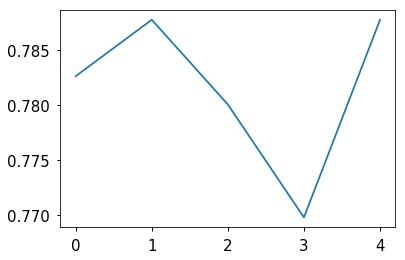

In [72]:
plot(score)

## Principal Components Analysis

In [91]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

train_features = ['Age', 'Fare', 'Sex0', 'Pclass', 'Child']
train_data = df.copy() # copy
train_data['Child'] = train_data.apply(lambda row: 1 if row['Age'] < 15 else 0, axis=1)
train_data = train_data[train_features].dropna()
# train_data['Sex_number'] = train_data.apply(lambda row: 0 if row['Sex'] == 'male' else 1, axis=1)
train_X = train_data.as_matrix()

my_pca = PCA(n_components=2)
preprocessed_train = preprocessing.normalize(preprocessing.scale(train_X))
print(preprocessed_train.shape)
#missing feature scaling and normalization
my_pca.fit(preprocessed_train)
trans = my_pca.transform(preprocessed_train)

(714, 5)


Text(0.5,1,'Fare')

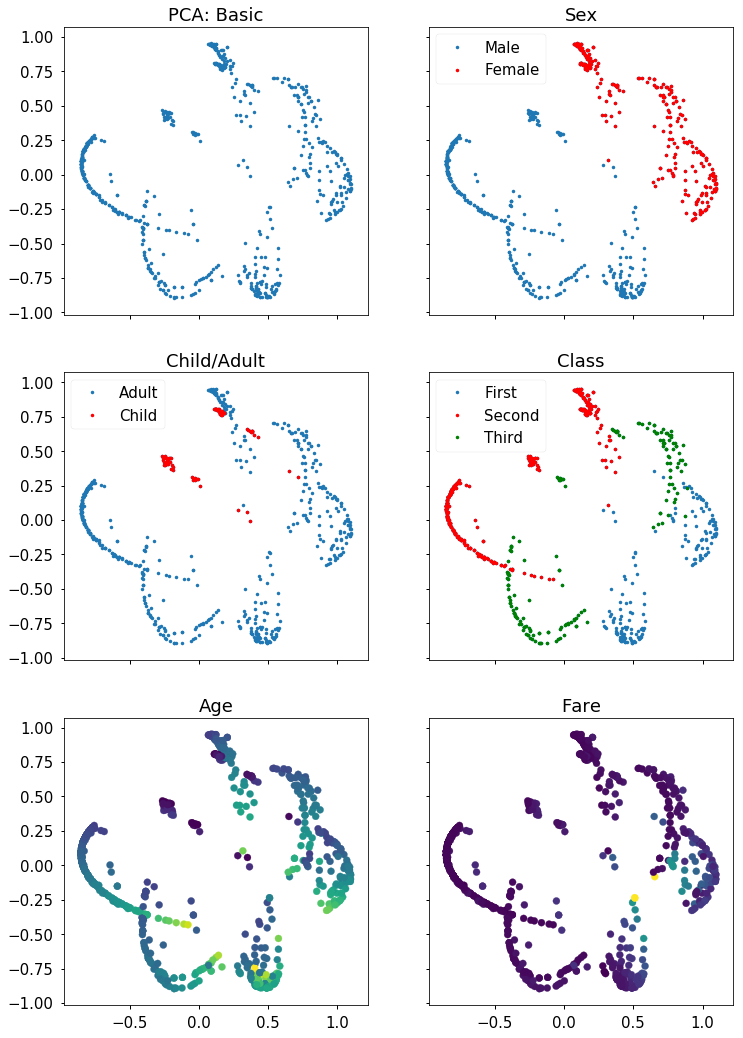

In [97]:
ig, axs = plt.subplots(3, 2, squeeze=False, sharex=True, sharey=True, figsize=(12, 18))
axs[0, 0].plot(trans[:,0], trans[:,1], '.')
axs[0, 0].set_title('PCA: Basic')

female_trans = np.array([tran for is_female, tran in zip(train_data['Sex0'], trans) if is_female==1])
axs[0, 1].plot(trans[:,0], trans[:,1], '.', label='Male')
axs[0, 1].plot(female_trans[:,0], female_trans[:,1], 'r.', label='Female')
axs[0, 1].set_title('Sex')
axs[0, 1].legend()

child_trans = np.array([tran for is_child, tran in zip(train_data['Child'], trans) if is_child==1])
axs[1, 0].plot(trans[:,0], trans[:,1], '.', label='Adult')
axs[1, 0].plot(child_trans[:,0], child_trans[:,1], 'r.', label='Child')
axs[1, 0].set_title('Child/Adult')
axs[1, 0].legend()

third_trans = np.array([tran for my_class, tran in zip(train_data['Pclass'], trans) if my_class==3])
second_trans = np.array([tran for my_class, tran in zip(train_data['Pclass'], trans) if my_class==2])
axs[1, 1].plot(trans[:,0], trans[:,1], '.', label='First')
axs[1, 1].plot(third_trans[:,0], third_trans[:,1], '.r', label='Second')
axs[1, 1].plot(second_trans[:,0], second_trans[:,1], '.g', label='Third')
axs[1, 1].set_title('Class')
axs[1, 1].legend()

axs[2, 0].scatter(trans[:,0], trans[:,1], edgecolors='face', c=train_data['Age'].as_matrix())
axs[2, 0].set_title('Age')

axs[2, 1].scatter(trans[:,0], trans[:,1], edgecolors='face', c=train_data['Fare'].as_matrix())
axs[2, 1].set_title('Fare')